# Zomato Data Analysis Project

# importing lybraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read CSV File

In [2]:
df=pd.read_csv("Zomato data .csv")

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#convert the data type of column-rate

In [11]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of resturant 


In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

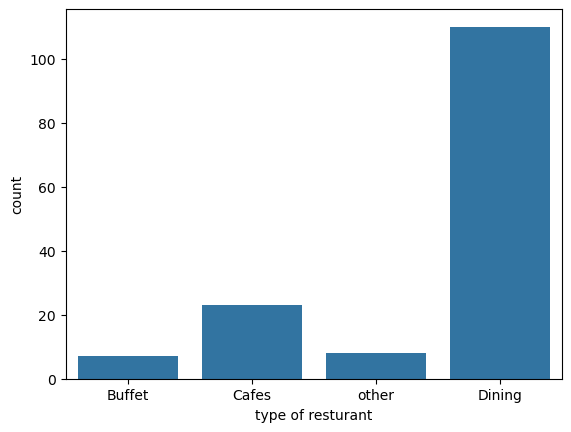

In [18]:
#1)what type of restaurant do he majority of customers oder from?
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

In [21]:
#conclusion -majority of the resturant falls in dinning category

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
# 2) how many votes has each type of restaurant received from customers?


Text(0, 0.5, 'votes')

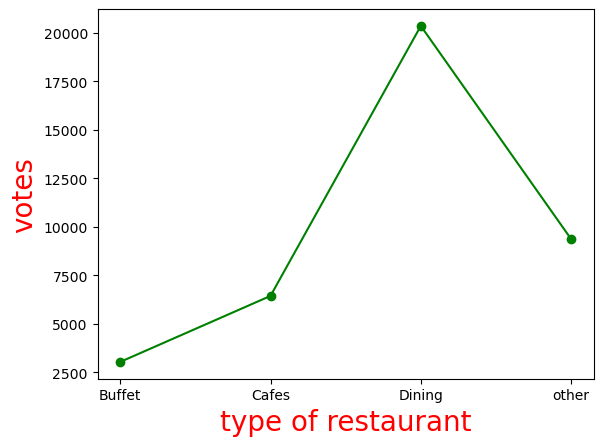

In [29]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

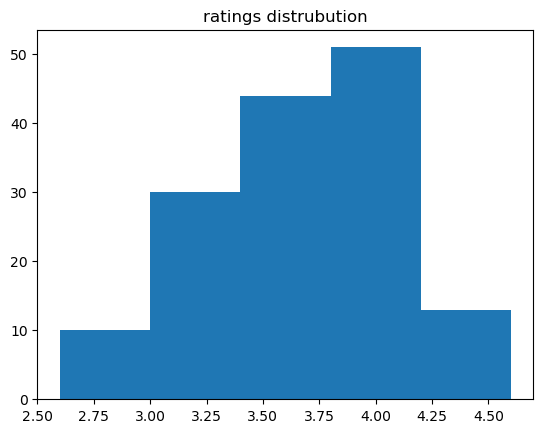

In [39]:
# 3.what are the rating that the majority of restaurants have received?
plt.hist(df['rate'],bins=5)
plt.title("ratings distrubution")
plt.show()

In [ ]:
#conclusion -the majority resturants received rating from 3.5 to 4

In [41]:
# 4.zomato ha observed that most couples order most of their food online.what is their 
#  average spending on each order?
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

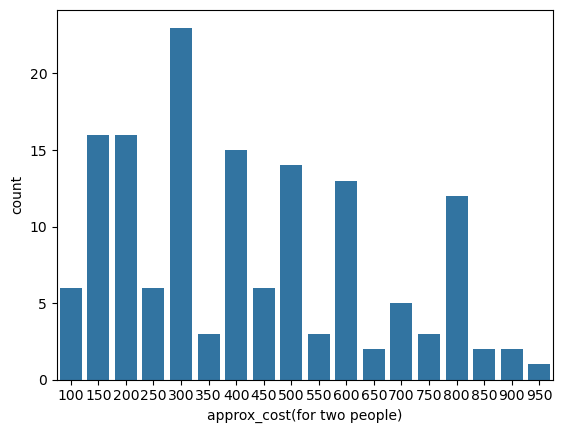

In [43]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion-the majority of couples perferr resturnats with an approximate cost of 300 rupees

5.which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

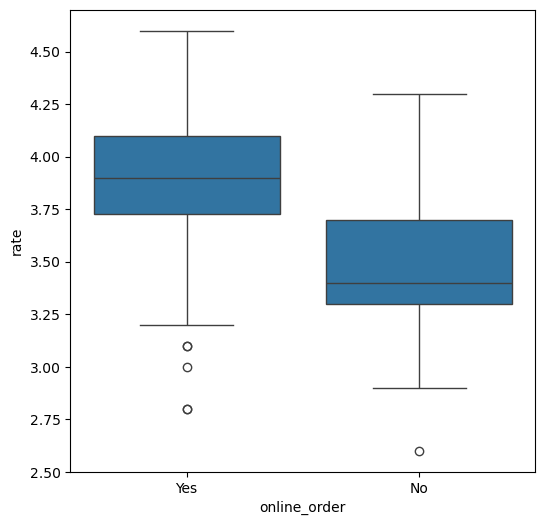

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

conclusion-offline order recived lower rating in comparison to online order

6.which type of restaurant recived more offline orders ,so that zomato can  customer with some good offers?

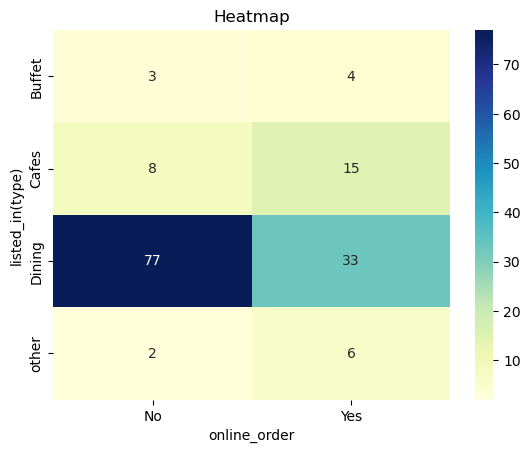

In [64]:
pivot_table=df.pivot_table(index="listed_in(type)",columns='online_order',aggfunc="size",fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

conclusion:Dining restaurants primarliy accpet offline orders ,where as cafes primarliy receive online orders .this suggests that clients perferm orders in person at restaurants ,but prefer online ordering at cafes.